<a href="https://colab.research.google.com/github/Ali-Nawab/dip_project_1/blob/main/handwritten_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [ ]:
random.seed(1)

In [ ]:
(x_train_val, y_train_val), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### **Normalize training and testing data**

In [ ]:
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### **Changing into categorical data**

In [ ]:

y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

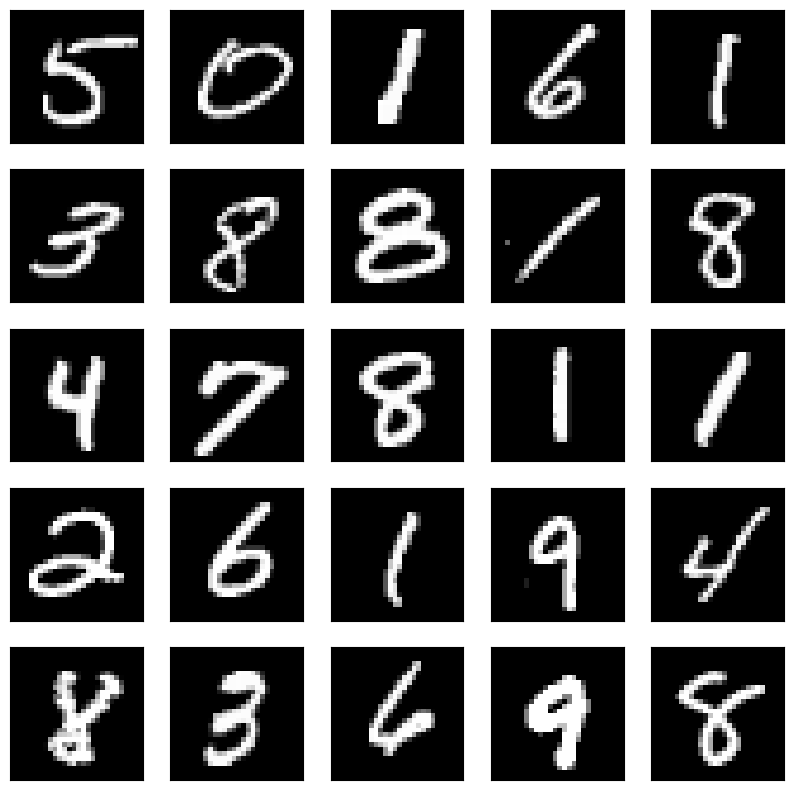

In [ ]:
# Visualize some of the training data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

## **Convolutional Neural Network**

In [ ]:
random.seed(1)
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
print("When 128 filters are applied", model.output_shape)  # prints (None, 26, 26, 128)
model.add(BatchNormalization())  # Add BatchNormalization layer
model.add(Conv2D(32, (3, 3), activation='relu'))
print("When 32 filters are applied", model.output_shape) # (None, 24, 24, 32)
model.add(MaxPooling2D(pool_size=(2, 2)))
print("Max Pooling is applied", model.output_shape) # (None, 12, 12, 32)
model.add(Dropout(0.25))
model.add(Flatten())
print(model.output_shape)  
model.add(Dense(128, activation='relu'))
print(model.output_shape)  
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.output_shape)  

When 32 filters are applied (None, 26, 26, 128)
When 64 filters are applied (None, 24, 24, 32)
Max Pooling is applied (None, 12, 12, 32)
(None, 4608)
(None, 128)
(None, 10)


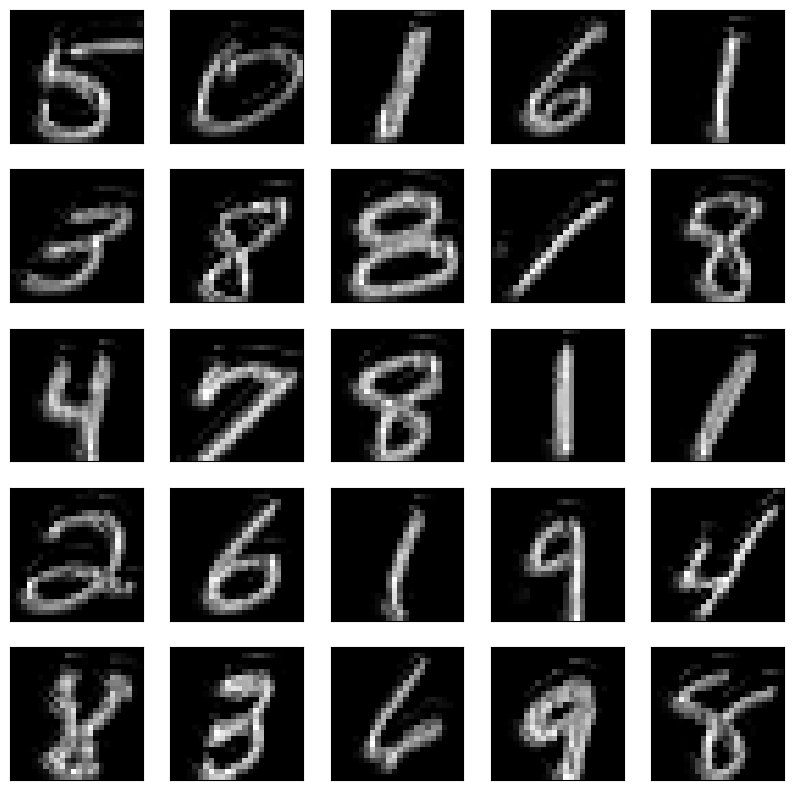

In [ ]:
# Visualize the output of the first convolutional layer
conv_layer = model.layers[2]
conv_output = keras.backend.function([model.input], [conv_layer.output])
output = conv_output([x_train[:25]])[0]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(output[i,:,:,0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
# Compile the model and train it on the training data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the Model data.
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 414s 1s/step - loss: 0.2927 - accuracy: 0.9099 - val_loss: 1.1626 - val_accuracy: 0.9739
Epoch 2/10
375/375 [==============================] - 414s 1s/step - loss: 0.1138 - accuracy: 0.9664 - val_loss: 0.0538 - val_accuracy: 0.9840
Epoch 3/10
375/375 [==============================] - 421s 1s/step - loss: 0.0819 - accuracy: 0.9749 - val_loss: 0.0413 - val_accuracy: 0.9872
Epoch 4/10
375/375 [==============================] - 414s 1s/step - loss: 0.0719 - accuracy: 0.9776 - val_loss: 0.0398 - val_accuracy: 0.9888
Epoch 5/10
375/375 [==============================] - 419s 1s/step - loss: 0.0620 - accuracy: 0.9813 - val_loss: 0.0415 - val_accuracy: 0.9888
Epoch 6/10
375/375 [==============================] - 412s 1s/step - loss: 0.0582 - accuracy: 0.9823 - val_loss: 0.0410 - val_accuracy: 0.9894
Epoch 7/10
375/375 [==============================] - 438s 1s/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0360 - val_accuracy: 0.9894

In [ ]:
# Checking the accuracy.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

Test loss: 0.03424255922436714
Test accuracy: 0.9902999997138977
[0.03424255922436714, 0.9902999997138977]


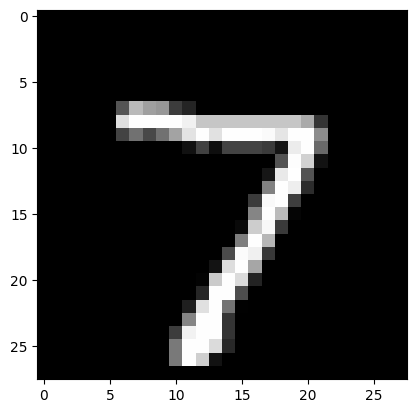

In [ ]:
# Plot the first testing image in the MNIST dataset
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.show()

In [ ]:
import numpy as np

prediction = model.predict(x_test[0].reshape(1, 28, 28, 1))

predicted_class = np.argmax(prediction)

print(f"Prediction: {predicted_class}")

1/1 [==============================] - 0s 131ms/step
Prediction: 7


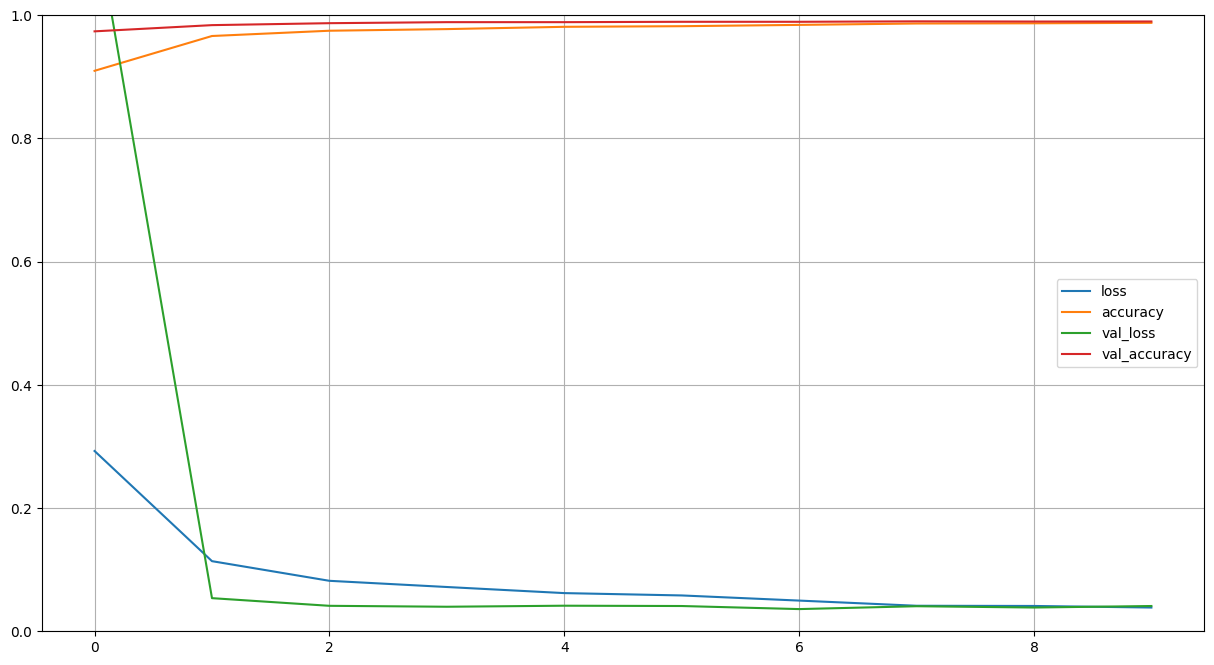

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Checking the number of 5 in testing data and also checking on how many 5 the model is giving us True Positive and True Negative

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert y_test to one-hot encoding
y_test_encoded = to_categorical(y_test)

# Convert y_test_encoded back to normal form
y_test_normal = np.argmax(y_test_encoded, axis=1)

# Count the number of 5s in the test labels
num_fives = np.sum(y_test_normal == 5)

# Get the indexes of the 5s in the test labels
five_indexes = np.where(y_test_normal == 5)[0]

# Print the number of 5s
print("Number of 5s in the MNIST dataset: ", num_fives)
print(f"Indexes of the 5s in the test labels: {five_indexes}")

check_pred = []

for i in five_indexes:
    if np.argmax(model.predict(x_test[i].reshape(1, 28, 28, 1))) == 5:
        check_pred.append(True)
    else:
        check_pred.append(False)

print(check_pred)

five = model.predict(x_test[0].reshape(1,28,28,1))
print(np.argmax(five))


Number of 5s in the MNIST dataset:  892
Indexes of the 5s in the test labels: [   8   15   23   45   52   53   59  102  120  127  129  132  152  153
  155  162  165  167  182  187  207  211  218  219  240  253  261  283
  289  317  319  333  340  347  351  352  356  364  367  375  395  397
  406  412  433  460  469  478  483  491  502  509  518  540  570  588
  604  618  638  645  654  674  692  694  710  711  720  739  751  766
  778  779  785  791  797  812  856  857  866  869  897  934  935  951
  955  970  978 1003 1022 1032 1041 1046 1070 1073 1082 1087 1089 1102
 1113 1115 1131 1135 1144 1146 1168 1169 1190 1221 1233 1235 1243 1252
 1258 1272 1281 1285 1289 1299 1331 1334 1339 1340 1370 1376 1378 1393
 1405 1406 1421 1447 1460 1466 1467 1471 1473 1476 1493 1510 1521 1525
 1550 1598 1618 1629 1635 1637 1639 1641 1653 1670 1672 1677 1684 1693
 1737 1747 1752 1755 1761 1810 1833 1846 1847 1860 1866 1874 1879 1896
 1902 1910 1911 1917 1931 1940 1948 1954 1967 1970 1999 2001 2003 2021

In [ ]:
print(len(five_indexes))
print(np.array(check_pred).shape)

892
(892,)


In [ ]:
data = {'x_test': five_indexes, 'prediction(x_test)': check_pred}
df = pd.DataFrame(data)
df

,x_test,prediction(x_test)
0,8,True
1,15,True
2,23,True
3,45,True
4,52,True
...,...,...
887,9941,True
888,9970,True
889,9982,True
890,9988,True


In [ ]:
num_false = df['prediction(x_test)'].value_counts()[False]
print("Number of False predictions: ", num_false)


Number of False predictions:  8


In [ ]:
model.save('/content/drive/MyDrive/your_Model.h5')